**Goal:** Compare the base model's performance for the KNeighborsClassifier (kNN) to the tuned model's performance using a cleaned UCI-ML Repo dataset (Speech Recognition).

In [15]:
# necessary imports for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# sklearn imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [16]:
# load data
srd = pd.read_csv('../Machine-Learning-Data/accent-mfcc-data-1.csv')



The dataset is quite small. There are  329  rows and  13 columns.



,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   language  329 non-null    object 
 1   X1        329 non-null    float64
 2   X2        329 non-null    float64
 3   X3        329 non-null    float64
 4   X4        329 non-null    float64
 5   X5        329 non-null    float64
 6   X6        329 non-null    float64
 7   X7        329 non-null    float64
 8   X8        329 non-null    float64
 9   X9        329 non-null    float64
 10  X10       329 non-null    float64
 11  X11       329 non-null    float64
 12  X12       329 non-null    float64
dtypes: float64(12), object(1)
memory usage: 33.5+ KB


**Cleaning**

In [17]:
# convert the target variable to categorical
srd['language'] = srd['language'].astype('category')

**EDA**

In [18]:
#sns.pairplot(srd, hue = 'language')
#plt.show()

**Model Set-up**

In [19]:
# create train and test sets
X = srd.drop(['language'], axis = 'columns')
y = srd['language']

# random sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 28)

# stratified sampling
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size = .25, random_state = 28, stratify = y)


In [20]:
# check proportions of each category for both samples
prop_counts = pd.DataFrame()
prop_counts['y_train'] = pd.Series(y_train.value_counts(normalize = True))
prop_counts['y_test'] = pd.Series(y_test.value_counts(normalize = True))
prop_counts['y_train_s'] = pd.Series(y_train_s.value_counts(normalize = True))
prop_counts['y_test_s'] = pd.Series(y_test_s.value_counts(normalize = True))
display(prop_counts)


,y_train,y_test,y_train_s,y_test_s
US,0.487805,0.542169,0.500000,0.506024
UK,0.150407,0.096386,0.138211,0.132530
FR,0.101626,0.060241,0.093496,0.084337
IT,0.097561,0.072289,0.089431,0.096386
ES,0.093496,0.072289,0.089431,0.084337
GE,0.069106,0.156627,0.089431,0.096386


The data frame shows the stratified train/test split has similar proportions via category. This might actually hurt the model as there are fewer samples to further split during cross-validation. My assumption is that I will have to use 3-5 fold cross-validation to achieve higher accuracy for the stratified split, while I can use 5-10 fold cross-validation for the random split.

**Stock Model**

In [21]:
# create the classifier and leave defaults values: p = 2 (Euclidean Distance), weights = 'uniform', n_neighbors = 5
knn_base = KNeighborsClassifier()
knn_base_s = KNeighborsClassifier()

# fit the model to both samples
knn_base.fit(X_train, y_train)
knn_base_s.fit(X_train_s, y_train_s)

KNeighborsClassifier()

Check the overall classification accuracy using the score method. It appears that the random sample produces slightly better accuracy than the stratified sample for the stock model.

In [22]:
# random
print('The overall accuracy is: ', round(knn_base.score(X_test, y_test),2) * 100, '%')
# stratified
print('The overall accuracy is: ', round(knn_base_s.score(X_test_s, y_test_s),2) * 100, '%')

The overall accuracy is:  80.0 %
The overall accuracy is:  77.0 %


Random Overall Accuracy:  80 %


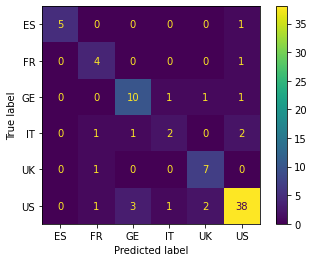

Stratified Overall Accuracy:  77 %


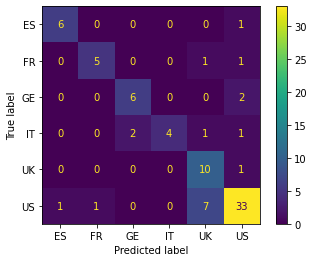

In [57]:
# make the predictions and check the score method manually
y_pred_base = knn_base.predict(X_test)
y_pred_base_s = knn_base_s.predict(X_test_s)

# create confusion matrices
cm_base = confusion_matrix(y_test, y_pred_base)
cm_base_s = confusion_matrix(y_test_s, y_pred_base_s)

# show results for manual calculation
print('Random Overall Accuracy: ', str(round(float(knn_base.score(X_test,y_test)) * 100)),'%')
plot_confusion_matrix(knn_base, X_test, y_test)
plt.show()
print('Stratified Overall Accuracy: ', str(round(float(knn_base_s.score(X_test_s,y_test_s)) * 100)), '%')
plot_confusion_matrix(knn_base_s, X_test_s, y_test_s)
plt.show()

The stock model on random sampling generalized better to the unseen data. Check the average cross_val_score for folds: 3,5,10 for each split.

In [24]:
# empty storage lists
random_cv_means = []
stratified_cv_means = []

# loop to get average values
for fold_num in [3,5,10]:
    #print(fold_num, ' - cv:\n')
    res = cross_val_score(knn_base, X_train, y_train, cv = fold_num)
    res_s = cross_val_score(knn_base_s, X_train_s, y_train_s, cv = fold_num)
    #print('random_scores: ', res,'\n')
    #print('stratified_scores: ', res_s, '\n')
    random_cv_means.append(np.mean(res))
    stratified_cv_means.append(np.mean(res_s))

# results
avg_cvs = pd.DataFrame()
avg_cvs['Folds'] = pd.Series([3,5,10])
avg_cvs['Random Mean Score'] = pd.Series(random_cv_means)
avg_cvs['Stratified Mean Score'] = pd.Series(stratified_cv_means)
display(avg_cvs.set_index('Folds'))

,Random Mean Score,Stratified Mean Score
Folds,,
3,0.780488,0.723577
5,0.776571,0.760245
10,0.788833,0.781167


Check Precision and Recall via generating a classification report.

In [25]:
# view the classifcation reports
print("Random Sampling:\n")
classification_report(y_test, y_pred_base).split('\n')

Random Sampling:



['              precision    recall  f1-score   support',
 '',
 '          ES       1.00      0.83      0.91         6',
 '          FR       0.57      0.80      0.67         5',
 '          GE       0.71      0.77      0.74        13',
 '          IT       0.50      0.33      0.40         6',
 '          UK       0.70      0.88      0.78         8',
 '          US       0.88      0.84      0.86        45',
 '',
 '    accuracy                           0.80        83',
 '   macro avg       0.73      0.74      0.73        83',
 'weighted avg       0.80      0.80      0.79        83',
 '']

In [26]:
print("Stratified Sampling:\n")
classification_report(y_test_s, y_pred_base_s).split('\n')

Stratified Sampling:



['              precision    recall  f1-score   support',
 '',
 '          ES       0.86      0.86      0.86         7',
 '          FR       0.83      0.71      0.77         7',
 '          GE       0.75      0.75      0.75         8',
 '          IT       1.00      0.50      0.67         8',
 '          UK       0.53      0.91      0.67        11',
 '          US       0.85      0.79      0.81        42',
 '',
 '    accuracy                           0.77        83',
 '   macro avg       0.80      0.75      0.75        83',
 'weighted avg       0.81      0.77      0.77        83',
 '']

### KNeighborsClassifier() with tuned hyperparameters

In [27]:
# set up the better format with the pipeline and steps
# scaling is not necessary as they are all MFCCs
steps = [('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)

# set up parameters and values to search over
parameters = {'knn__n_neighbors': range(1,20), # set range through p (features)
              'knn__p': range(1,3), # set range over manhattan and euclidean distances
              'knn__weights': ['uniform', 'distance']} # use equal voting and weighting voting via proximity

# instantiate the gridsearch cv object over the pipeline and parameters
# this searches for the best parameters for the model and uses those for scoring
knn_cv_object = GridSearchCV(pipeline, parameters, cv = 5) # use 5-fold cv as this works best in tuned model
knn_cv_object_s = GridSearchCV(pipeline, parameters, cv = 5)

# fit the object - random sampling
knn_cv_object.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 20),
                         'knn__p': range(1, 3),
                         'knn__weights': ['uniform', 'distance']})

In [28]:
# fit the object - stratified sampling
knn_cv_object_s.fit(X_train_s, y_train_s)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 20),
                         'knn__p': range(1, 3),
                         'knn__weights': ['uniform', 'distance']})

Check the overall classification accuracy using the score method. It appears that the random sample produces much better accuracy than the stratified sample for the tuned model.

In [31]:
# random
print('The overall accuracy is: ', round(knn_cv_object.score(X_test, y_test),2) * 100, '%')
# stratified
print('The overall accuracy is: ', round(knn_cv_object_s.score(X_test_s, y_test_s),2) * 100, '%')

The overall accuracy is:  83.0 %
The overall accuracy is:  81.0 %


The best parameters are:

In [32]:
# print best params
print('Best Parameters - Random: ', knn_cv_object.best_params_, '\n')
print('Best Parameters - Stratified: ', knn_cv_object_s.best_params_, '\n')

Best Parameters - Random:  {'knn__n_neighbors': 6, 'knn__p': 2, 'knn__weights': 'distance'} 

Best Parameters - Stratified:  {'knn__n_neighbors': 3, 'knn__p': 2, 'knn__weights': 'distance'} 



#### Note:
**Setting the cv value for the grid search object above to 3,5,10 yields the following values for score accuracy:**

Random: [81%, 83%, 83%]

Stratified: [81%, 81%, 73%]

**This agrees with the original assumption I made that there wouldn't be enough observations in the training set for 10-fold CV to do well. This brings up an interesting point though. If the random state chosen pulled enough observations from the minority groups then the cross-validation would achieve good results, however if it failed to pull enough, then the generalization to unseen data might score really low. Because of this, the stratified sample should be used and the number of folds should be chosen to maximize the accuracy for the stratified sampling.**

Random Overall Accuracy:  83 %


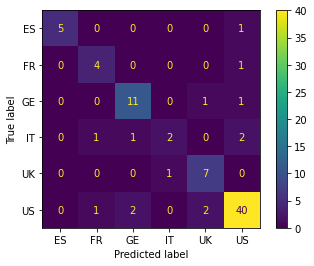

Stratified Overall Accuracy:  81 %


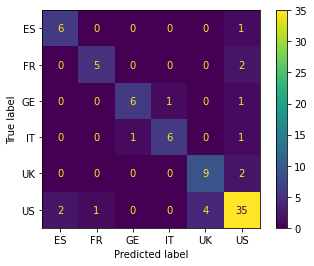

In [59]:
# make the predictions and check the score method manually
y_pred_tuned = knn_cv_object.predict(X_test)
y_pred_tuned_s = knn_cv_object_s.predict(X_test_s)

# create confusion matrices
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
cm_tuned_s = confusion_matrix(y_test_s, y_pred_tuned_s)

# show results for manual calculation
print('Random Overall Accuracy: ', str(round(float(knn_cv_object.score(X_test,y_test)) * 100)),'%')
plot_confusion_matrix(knn_cv_object,X_test,y_test)
plt.show()
print('Stratified Overall Accuracy: ', str(round(float(knn_cv_object_s.score(X_test_s,y_test_s)) * 100)),'%')
plot_confusion_matrix(knn_cv_object_s,X_test_s,y_test_s)
plt.show()

By tuning the hyperparameters of the model we achieved a 4% increase in accuracy for the proper stratified sampling.

In [60]:
print("Stratified Sampling:\n")
classification_report(y_test_s, y_pred_tuned_s).split('\n')

Stratified Sampling:



['              precision    recall  f1-score   support',
 '',
 '          ES       0.75      0.86      0.80         7',
 '          FR       0.83      0.71      0.77         7',
 '          GE       0.86      0.75      0.80         8',
 '          IT       0.86      0.75      0.80         8',
 '          UK       0.69      0.82      0.75        11',
 '          US       0.83      0.83      0.83        42',
 '',
 '    accuracy                           0.81        83',
 '   macro avg       0.80      0.79      0.79        83',
 'weighted avg       0.81      0.81      0.81        83',
 '']

Visualize the decision boundaries

Saving the following tuned model to the working directory...

In [61]:
import joblib

joblib.dump(knn_cv_object_s, 'KNeighborsClassifier_tuned_model.sav')

['KNeighborsClassifier_tuned_model.sav']

Load and view saved model...

In [62]:
best_model = joblib.load('KNeighborsClassifier_tuned_model.sav')
best_model

GridSearchCV(cv=5, estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 20),
                         'knn__p': range(1, 3),
                         'knn__weights': ['uniform', 'distance']})